## Quest

아래 모델은 CIFAR10이라는 이미지 데이터셋을 분류하기 위한 학습 모델의 예시입니다.
해당 모델에서 validation set(별도의 test_set을 두지 않았기에 validation set이 곧 test_set입니다)의 **Epoch수는 20 이내로 제한하고 accuracy를 가능한 높게 달성할 수 있도록 모델을 이리저리 변형해보세요**

** 기존 코드에서 Dropout을 적용하여 정확도를 어느 정도 높여놓았습니다!  BatchNormalization을 layer들에 적용해보시고 필요하다면 layer들을 더 쌓는 등의 시도를 해보세요!**

**최저기준 : 80% 달성**

170500096/170498071 [==============================] - 4s 0us/step


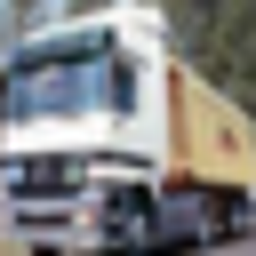

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from PIL import Image
import numpy as np
import os

batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 10

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img = Image.fromarray(x_train[1], 'RGB')
img.resize((256, 256))

In [3]:
# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [13]:
model = Sequential([
  layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape, activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  
  layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.BatchNormalization(),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(num_classes, activation='softmax')
])

# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same',
#                  input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs=20
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


Epoch 1/20
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4406 - accuracy: 0.4989 - val_loss: 1.1048 - val_accuracy: 0.6146
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0039 - accuracy: 0.6491 - val_loss: 1.2282 - val_accuracy: 0.5811
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8544 - accuracy: 0.7005 - val_loss: 0.8021 - val_accuracy: 0.7214
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7672 - accuracy: 0.7333 - val_loss: 0.8109 - val_accuracy: 0.7250
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7045 - accuracy: 0.7537 - val_loss: 0.6647 - val_accuracy: 0.7669
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6447 - accuracy: 0.7747 - val_loss: 1.1009 - val_accuracy: 0.6706
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5991 - accuracy: 0.7894 - val_loss: 0.6260 - val_ac

80% 넘었어요!!! ᕕ( ᐛ )ᕗ